In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
#adopted from:
#https://github.com/csbanon/mnist-classifiers/blob/main/mnist-digits/mnist-digit-classification-with-a-convolutional-neural-network.ipynb

In [3]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [4]:
#train_data[0][0]
#train_data[1][0]

In [5]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [6]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [7]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [8]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


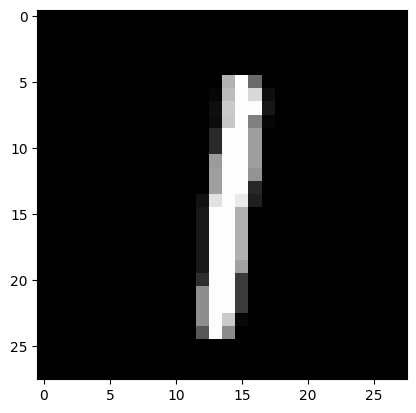

In [9]:
# Show a sample MNIST digit.
plt.imshow(train_images[40], cmap=plt.get_cmap('gray'))
plt.show()

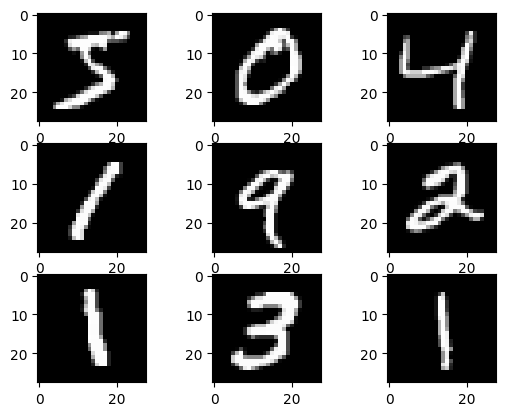

In [10]:
#we can do it better;)
for i in range(9): 
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [12]:
# Define the convolutional neural network.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/opt/anaconda3/envs/qml-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Show the model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Define the parameters.
num_epochs = 10
batch_size = 128

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8259 - loss: 0.5698 - val_accuracy: 0.9791 - val_loss: 0.0681
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9782 - loss: 0.0695 - val_accuracy: 0.9857 - val_loss: 0.0432
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9878 - val_loss: 0.0349
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9899 - val_loss: 0.0287
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9895 - val_loss: 0.0350
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9916 - val_loss: 0.0253
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accu

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9873 - loss: 0.0412
Test Accuracy: 0.9902999997138977
Test Loss: 0.030349314212799072


In [17]:
# Save the metrics.
metrics = history.history

In [18]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

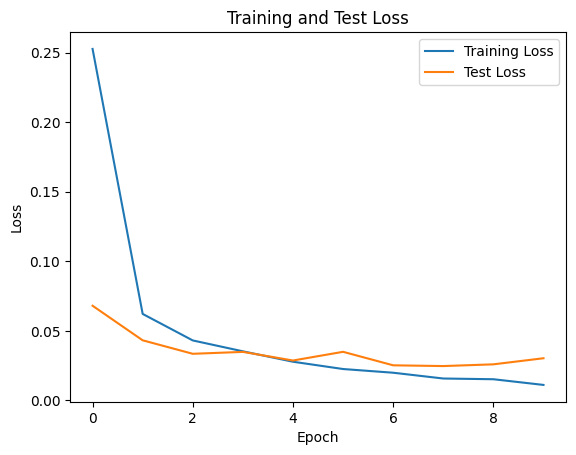

In [19]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [20]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

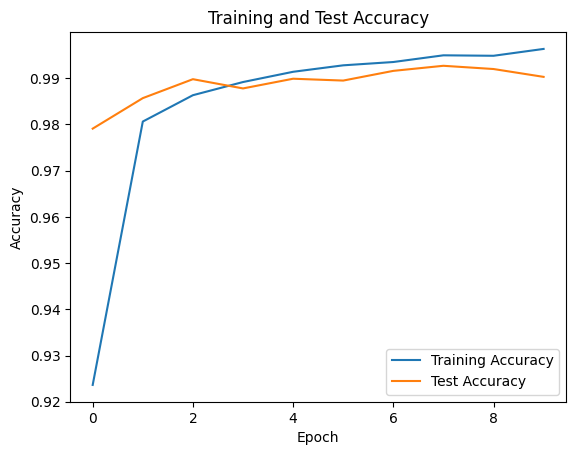

In [21]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

In [22]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


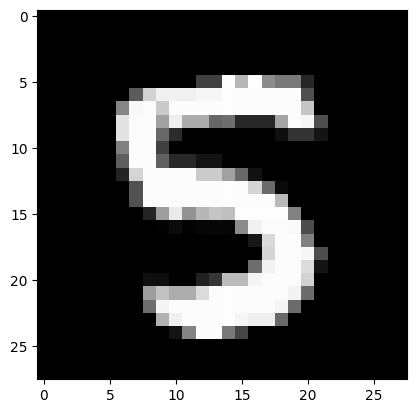

In [23]:
# Choose an index.
index = 120

# Show an image from the test set.
plt.imshow(test_images[index], cmap=plt.get_cmap('gray'))
plt.show()

In [24]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5
